### MIS581: Capstone project - US Organization

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
# read the CSV file as DataFrame; specify 1st row as header; assign column name;
df = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv', header=0, 
                 names=['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status',  
                        'sex', 'age_group', 'race_ethnicity', 
                        'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'])

C:\Users\Pulak Debnath\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head(10)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
5,2020/11/17,2020/11/10,2020/11/08,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
6,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing
7,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
8,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
9,2020/11/17,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing


##### Create a dataset with replacing missing data; Filtering records which has pre-existing condition confirmed; Also, create a new variable "severe_ill" based on ICU or Death flag;

In [4]:
df1 = df[(df.medcond_yn=='Yes')][['sex', 'age_group', 'race_ethnicity', 'hosp_yn', 'icu_yn', 'death_yn']]

In [5]:
df1['hosp_yn'].replace(['Missing','Unknown'], 'No', inplace=True)
df1['icu_yn'].replace(['Missing','Unknown'], 'No', inplace=True)
df1['death_yn'].replace(['Missing','Unknown'], 'No', inplace=True)

df1.head(10)

,sex,age_group,race_ethnicity,hosp_yn,icu_yn,death_yn
4,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
14,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
16,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
23,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
29,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
34,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
39,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
41,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
42,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No
49,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No


In [6]:
# add severity flag
df1['severe_ill'] = df1.apply(lambda row: 'Yes' if (row.icu_yn == 'Yes' or row.death_yn == 'Yes') else 'No', axis=1)

df1.head(10)

,sex,age_group,race_ethnicity,hosp_yn,icu_yn,death_yn,severe_ill
4,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
14,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
16,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
23,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
29,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
34,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
39,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
41,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
42,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
49,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No


In [7]:
df1[(df1.severe_ill == 'Yes')]

,sex,age_group,race_ethnicity,hosp_yn,icu_yn,death_yn,severe_ill
9133,Female,10 - 19 Years,Unknown,Yes,Yes,No,Yes
18293,Male,10 - 19 Years,Unknown,Yes,Yes,No,Yes
19041,Female,10 - 19 Years,"Black, Non-Hispanic",Yes,Yes,No,Yes
24424,Female,10 - 19 Years,"White, Non-Hispanic",Yes,Yes,No,Yes
26376,Male,10 - 19 Years,"White, Non-Hispanic",Yes,Yes,No,Yes
...,...,...,...,...,...,...,...
8398748,Female,30 - 39 Years,Hispanic/Latino,Yes,Yes,No,Yes
8398912,Female,30 - 39 Years,Hispanic/Latino,Yes,No,Yes,Yes
8399520,Female,30 - 39 Years,Hispanic/Latino,Yes,Yes,No,Yes
8400163,Female,30 - 39 Years,Hispanic/Latino,Yes,Yes,No,Yes


In [8]:
# total severe case %
severe = pd.value_counts(df1.severe_ill, sort=False).to_frame(name='Total')
total_case = np.sum(severe.Total)
print(total_case)
severe['percentage'] = severe.apply((lambda x: x.Total*100/total_case), axis=1)
severe

785255


,Total,percentage
No,696314,88.673616
Yes,88941,11.326384


### Hypothesis test based on Gender

In [139]:
# prepare data for Male and Female groups only
dfgender = df1[(df1.sex == 'Male') | (df1.sex == 'Female')]

gender = dfgender.groupby('sex')['severe_ill'].agg([lambda x: np.sum(x=='Yes'),  'size'])
gender.columns = ['SeverityCnt', 'TotalCnt']

gender

,SeverityCnt,TotalCnt
sex,,
Female,39981,418829
Male,48815,363395


In [10]:
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [11]:
#Test statistics

#Population proportion with sevitiry
p_pop = len(dfgender[dfgender.severe_ill == 'Yes'])/len(dfgender)
print('Population proportion of severity illness: ', p_pop)

p_f = gender.SeverityByGender.Female
p_m = gender.SeverityByGender.Male

n_f = gender.Total.Female
n_m = gender.Total.Male

#std. error for two population proportion
se_gender = np.sqrt(p_pop*(1-p_pop)*(1/n_f + 1/n_m))
print('Std. Error of Gender severity illness: ', se_gender)

#best estimate
be_gender = p_f - p_m
print('Best estimate: ', be_gender)
#hypothesized estimate
h0_gender = 0
#test_statistics (z-score)
test_stat_gender = (be_gender - h0_gender)/se_gender
print('Test statistics of Gender severity illness: ', test_stat_gender)

# p-value
pvalue_gender = 2*dist.norm.cdf(-np.abs(test_stat_gender))
print('p-value of gender severity illness: ', pvalue_gender)

Population proportion of severity illness:  0.11351735564237354
Std. Error of Gender severity illness:  0.0007191574333261697
Best estimate:  -0.03887140586807998
Test statistics of Gender severity illness:  -54.051316258105174
p-value of gender severity illness:  0.0


In [12]:
import scipy.stats as sci

In [13]:
# prepare contengincy table of sex and severe illness frequency counts
dfg = df1[(df1.sex != 'Unknown') & (df1.sex != 'Missing')]

g = pd.crosstab(dfg['sex'], dfg['severe_ill'])
g

severe_ill,No,Yes
sex,,
Female,378848,39981
Male,314580,48815
Other,91,5


In [14]:
# Use Pearson's Chi-squared test for hypothesis testing
stat, p, dof, expected = sci.chi2_contingency(g)

# interprete test statistics and p-value
print('Test statistics: ', stat)
print('p-value: ', p)

Test statistics:  2925.314190922877
p-value:  0.0


### Visual analysis - Gender

In [148]:
gender_total = gender['TotalCnt'].sum()

gender['SeverityPct'] = gender.apply(lambda x: round((x.SeverityCnt *100/gender_total), 2), axis=1)
gender['TotalPct'] = gender.apply(lambda x: round((x.TotalCnt *100/gender_total), 2), axis=1)

gender

,SeverityCnt,TotalCnt,SeverityPct,TotalPct
Female,39981,418829,5.11,53.54
Male,48815,363395,6.24,46.46


In [160]:
%matplotlib inline

import matplotlib.pyplot as plt

<ipython-input-162-0350fbbb1ffd>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


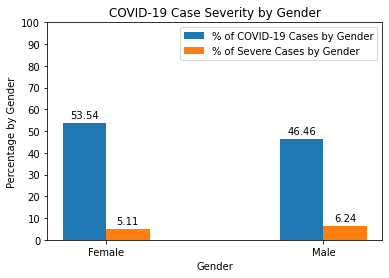

In [162]:
# gender already has the data needed for this visualtization
gender.index = ['Female', 'Male']

xg = np.arange(len(gender.index))  # the label locations
width = 0.2  # the width of the bars

fig, ax1 = plt.subplots(figsize=(6, 4))
rects1 = ax1.bar(xg - width/2, gender.TotalPct, width, label='% of COVID-19 Cases by Gender')
rects2 = ax1.bar(xg + width/2, gender.SeverityPct, width, label='% of Severe Cases by Gender')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Gender')
ax1.set_ylabel('Percentage by Gender')
ax1.set_title('COVID-19 Case Severity by Gender')
ax1.set_yticks(np.arange(0, 110, 10))
ax1.set_xticks(xg)
ax1.set_xticklabels(gender.index)
ax1.legend()

# adding the count label for each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
                 
fig.show()   

### Hypothesis test based on Age Group

In [15]:
# prepare contengincy table for age group
dfage = df1[(df1.age_group != 'Unknown') & (df1.age_group != 'Missing')]

ag = pd.crosstab(dfage['age_group'], dfage['severe_ill'])
ag

severe_ill,No,Yes
age_group,,
0 - 9 Years,11995,118
10 - 19 Years,37906,239
20 - 29 Years,80436,877
30 - 39 Years,87116,2062
40 - 49 Years,108521,4297
50 - 59 Years,135933,9725
60 - 69 Years,116604,17088
70 - 79 Years,70560,21338
80+ Years,46980,33190


In [16]:
# Use Pearson's Chi-squared test for hypothesis testing
stat, p, dof, expected = sci.chi2_contingency(ag)

# interprete test statistics and p-value
print('Test statistics: ', stat)
print('p-value: ', p)

Test statistics:  116229.34253718083
p-value:  0.0


In [17]:
# calculate percentage by age group
ag['sum_by_group'] = ag.agg([lambda x: np.sum(x.No + x.Yes)], axis=1)
ag['severity_pct_grp'] = ag.apply((lambda x: (x.Yes/(x.Yes+x.No))*100), axis=1)
ag_total = np.sum(ag['sum_by_group'])
print('Total population with Age Group data', ag_total)
print('Total severe cases', np.sum(ag.Yes))
ag['severity_pct_pop'] = ag.apply((lambda x: (x.Yes/ag_total)*100), axis=1)
ag

Total population with Age Group data 784985
Total severe cases 88934


severe_ill,No,Yes,sum_by_group,severity_pct_grp,severity_pct_pop
age_group,,,,,
0 - 9 Years,11995,118,12113,0.974160,0.015032
10 - 19 Years,37906,239,38145,0.626557,0.030446
20 - 29 Years,80436,877,81313,1.078548,0.111722
30 - 39 Years,87116,2062,89178,2.312229,0.262680
40 - 49 Years,108521,4297,112818,3.808789,0.547399
50 - 59 Years,135933,9725,145658,6.676599,1.238877
60 - 69 Years,116604,17088,133692,12.781617,2.176857
70 - 79 Years,70560,21338,91898,23.219221,2.718269
80+ Years,46980,33190,80170,41.399526,4.228106


### Visualization by Age Group

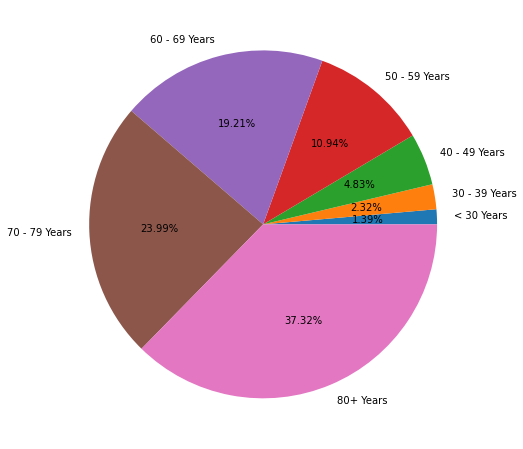

In [163]:
# Pie-chart to show Severity by Age-Group
piedata = ag['Yes']

#Groups with low % . Combine those as "Others"
smalldata = piedata[piedata < 2000]
others = pd.Series([smalldata.sum()], index=['< 30 Years'])
piedata = piedata[piedata >= 2000].append(others).sort_values()

piedata.plot(kind='pie', label='', figsize=(10,8), autopct='%1.2f%%');     #using pandas plot() method

### Hypothesis test based on Race and Ethnicity

In [18]:
# prepare contengincy table for race/ethnicity
dfre = df1[(df1.race_ethnicity != 'Unknown') & (df1.race_ethnicity != 'Missing')]

re = pd.crosstab(dfre['race_ethnicity'], dfre['severe_ill'])
re

severe_ill,No,Yes
race_ethnicity,,
"American Indian/Alaska Native, Non-Hispanic",3378,357
"Asian, Non-Hispanic",15712,3335
"Black, Non-Hispanic",101376,17607
Hispanic/Latino,116321,13278
"Multiple/Other, Non-Hispanic",20484,3328
"Native Hawaiian/Other Pacific Islander, Non-Hispanic",3787,305
"White, Non-Hispanic",319702,42396


In [19]:
# Use Pearson's Chi-squared test for hypothesis testing
stat, p, dof, expected = sci.chi2_contingency(re)

# interprete test statistics and p-value
print('Test statistics: ', stat)
print('p-value: ', p)

Test statistics:  1976.9639030767557
p-value:  0.0


In [202]:
#Race/Ethnicity analysis
re['sub_total'] = re.apply((lambda x: x.Yes+x.No), axis=1)
re['severe_pct_grp'] = re.apply(lambda x: '%.2f'%(x.Yes*100/(x.Yes+x.No)), axis=1)
total_re = np.sum(re.sub_total)
re['severe_pct_pop'] = re.apply(lambda x: '%.4f'%(x.Yes*100/total_re), axis=1)
re['cases_pct_by_group'] = re.apply(lambda x: '%.2f'%(x.sub_total*100/total_re), axis=1 )
print('total with Race/Ethnicity: ', total_re)
print('Total Severe cases: ', np.sum(re.Yes))
re

total with Race/Ethnicity:  661366
Total Severe cases:  80606


severe_ill,No,Yes,sub_total,severe_pct_grp,severe_pct_pop,cases_pct_by_group
race_ethnicity,,,,,,
"American Indian/Alaska Native, Non-Hispanic",3378,357,3735,9.56,0.0540,0.56
"Asian, Non-Hispanic",15712,3335,19047,17.51,0.5043,2.88
"Black, Non-Hispanic",101376,17607,118983,14.80,2.6622,17.99
Hispanic/Latino,116321,13278,129599,10.25,2.0077,19.60
"Multiple/Other, Non-Hispanic",20484,3328,23812,13.98,0.5032,3.60
"Native Hawaiian/Other Pacific Islander, Non-Hispanic",3787,305,4092,7.45,0.0461,0.62
"White, Non-Hispanic",319702,42396,362098,11.71,6.4104,54.75


### Race/Ethnicity visualization

In [296]:
re1 = re[['severe_pct_grp', 'severe_pct_pop']]
np.array(re1.severe_pct_grp)

array(['9.56', '17.51', '14.80', '10.25', '13.98', '7.45', '11.71'],
      dtype=object)

0.0
1.0
2.0
3.0
4.0
5.0
6.0


<ipython-input-343-6ca92e1b2847>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


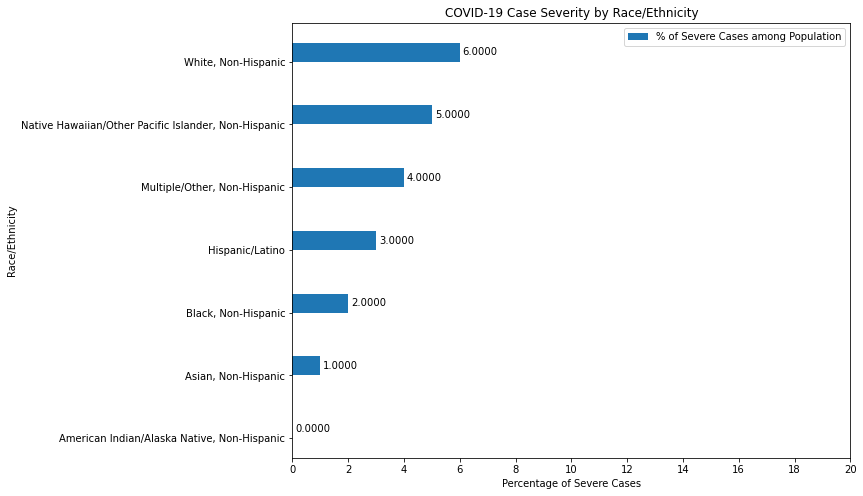

In [343]:
# re already has the data needed for this visualtization

xre = np.arange(len(re1.index))  # the label locations
width = 0.3  # the width of the bars

fig2, ax2 = plt.subplots(figsize=(10, 8))
reh1 = ax2.barh(xre - width/2, re1.severe_pct_grp, width, label='% of Severe Cases among Cohort Group')
reh2 = ax2.barh(xre + width/2, re1.severe_pct_pop.tolist(), width, label='% of Severe Cases among Population')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_xlabel('Percentage of Severe Cases')
ax2.set_ylabel('Race/Ethnicity')
ax2.set_title('COVID-19 Case Severity by Race/Ethnicity')
xlab = np.arange(0, 22, 2)
ax2.set_xticks(xlab)
ax2.set_xticklabels(xlab)
ax2.set_yticks(xre)
ax2.set_yticklabels(re1.index)
ax2.legend()

# adding the count label for each bar
def autolabelh(rects):
    for rect in rects:
        w = rect.get_width()
        #print(w)
        ax2.annotate('%.4f'%w,
                    xy=(w, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

        
autolabelh(reh1)
autolabelh(reh2)
                 
fig2.show() 

<ipython-input-276-fb33a707e99b>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


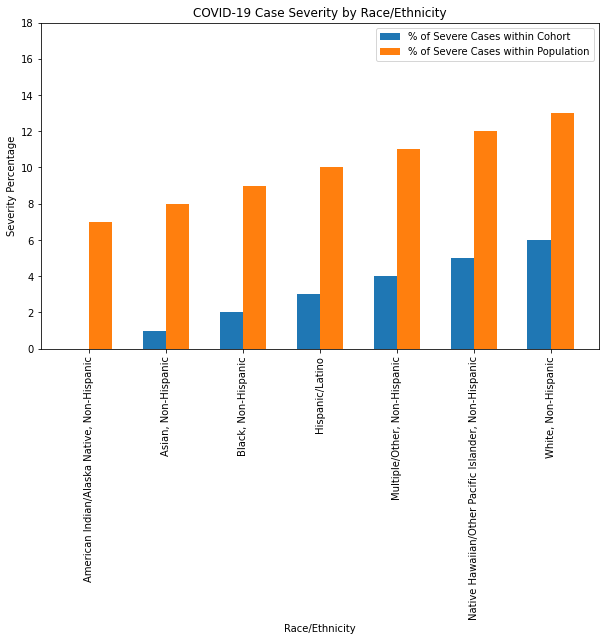

In [276]:
xre = np.arange(len(re.index))  # the label locations
width = 0.3  # the width of the bars

fig2, ax2 = plt.subplots(figsize=(10, 6))
re1 = ax2.bar(xre - width/2, re.severe_pct_grp, width, label='% of Severe Cases within Cohort')
re2 = ax2.bar(xre + width/2, re.severe_pct_pop, width, label='% of Severe Cases within Population')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_xlabel('Race/Ethnicity')
ax2.set_ylabel('Severity Percentage')
ax2.set_title('COVID-19 Case Severity by Race/Ethnicity')
ax2.set_yticks(np.arange(0, 20, 2))
ax2.set_yticklabels(np.arange(0, 20, 2))
ax2.set_xticks(xre)
ax2.set_xticklabels(re.index, rotation=90)
ax2.legend()

# adding the count label for each bar
def autolabel1(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel1(re1)
autolabel1(re2)
                 
fig2.show()   

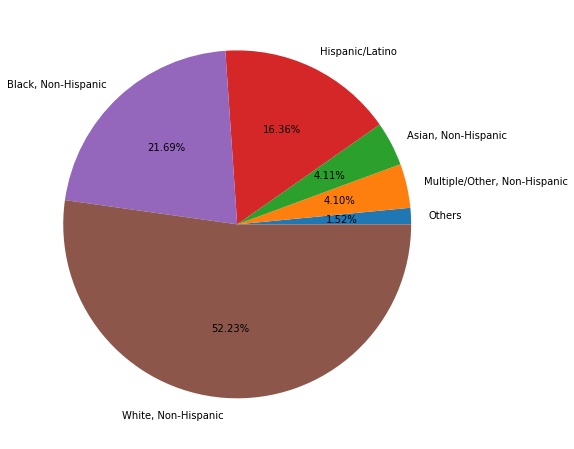

In [165]:
# Pie-chart to show Severity by Age-Group
piedata1 = re['Yes']

#Groups with low % . Combine those as "Others"
smalldata1 = piedata[piedata < 1000]
others1 = pd.Series([smalldata.sum()], index=['Others'])
piedata1 = piedata1[piedata1 >= 1000].append(others1).sort_values()

piedata1.plot(kind='pie', label='', figsize=(10,8), autopct='%1.2f%%');     #using pandas plot() method

## Model Building
### Decision Tree

In [300]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [370]:
col_name = ['sex', 'age_group', 'race_ethnicity', 'severe_ill']

data1 = df1[col_name]
data1 = data1[(data1.sex=='Male') | (data1.sex=='Female')]
data1 = data1[(data1.age_group!='Unknown')]
data1 = data1[(data1.race_ethnicity!='Unknown')]
data1.head()

,sex,age_group,race_ethnicity,severe_ill
4,Male,10 - 19 Years,"Black, Non-Hispanic",No
14,Male,10 - 19 Years,"Black, Non-Hispanic",No
16,Male,10 - 19 Years,"Black, Non-Hispanic",No
23,Male,10 - 19 Years,"Black, Non-Hispanic",No
29,Male,10 - 19 Years,"Black, Non-Hispanic",No


In [371]:
## convert male/femal to binary integer
sex = {'Male':1, 'Female':0}
data1.sex = [sex[i] for i in data1.sex]


In [372]:
#convert severe_ill to int
severe_ill = {'Yes':1, 'No':0}
data1.severe_ill = [severe_ill[i] for i in data1.severe_ill]
data1.head()

,sex,age_group,race_ethnicity,severe_ill
4,1,10 - 19 Years,"Black, Non-Hispanic",0
14,1,10 - 19 Years,"Black, Non-Hispanic",0
16,1,10 - 19 Years,"Black, Non-Hispanic",0
23,1,10 - 19 Years,"Black, Non-Hispanic",0
29,1,10 - 19 Years,"Black, Non-Hispanic",0


In [373]:
## Create ordinal encoding for age_group variables
data1.age_group.unique()

age_grp = {'0 - 9 Years':0,'10 - 19 Years':1,'20 - 29 Years':2,'30 - 39 Years':3,'40 - 49 Years':4,
       '50 - 59 Years':5,'60 - 69 Years':6,'70 - 79 Years':7, '80+ Years':8}

data1.age_group = data1.age_group.replace(age_grp)
data1.head()

,sex,age_group,race_ethnicity,severe_ill
4,1,1,"Black, Non-Hispanic",0
14,1,1,"Black, Non-Hispanic",0
16,1,1,"Black, Non-Hispanic",0
23,1,1,"Black, Non-Hispanic",0
29,1,1,"Black, Non-Hispanic",0


In [374]:
## Race/Ethnicity convert to dummy variables
data1 = pd.get_dummies(data1, columns=['race_ethnicity'])

In [404]:
features = data1.columns.values.tolist()
features.remove('severe_ill')
features

['sex',
 'age_group',
 'race_ethnicity_American Indian/Alaska Native, Non-Hispanic',
 'race_ethnicity_Asian, Non-Hispanic',
 'race_ethnicity_Black, Non-Hispanic',
 'race_ethnicity_Hispanic/Latino',
 'race_ethnicity_Missing',
 'race_ethnicity_Multiple/Other, Non-Hispanic',
 'race_ethnicity_Native Hawaiian/Other Pacific Islander, Non-Hispanic',
 'race_ethnicity_White, Non-Hispanic']

In [405]:
# prepare dataset with feature variables and target variable
X = data1[features]
y = data1.severe_ill

In [406]:
len(X)

662559

In [407]:
# split training/test dataset - 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 


In [483]:
# Building Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, class_weight={0:1, 1:2})

#train model
clf = clf.fit(X_train, y_train)  

#predict with test dataset
y_pred = clf.predict(X_test)

In [484]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8636249295661274


### Visualize decision tree

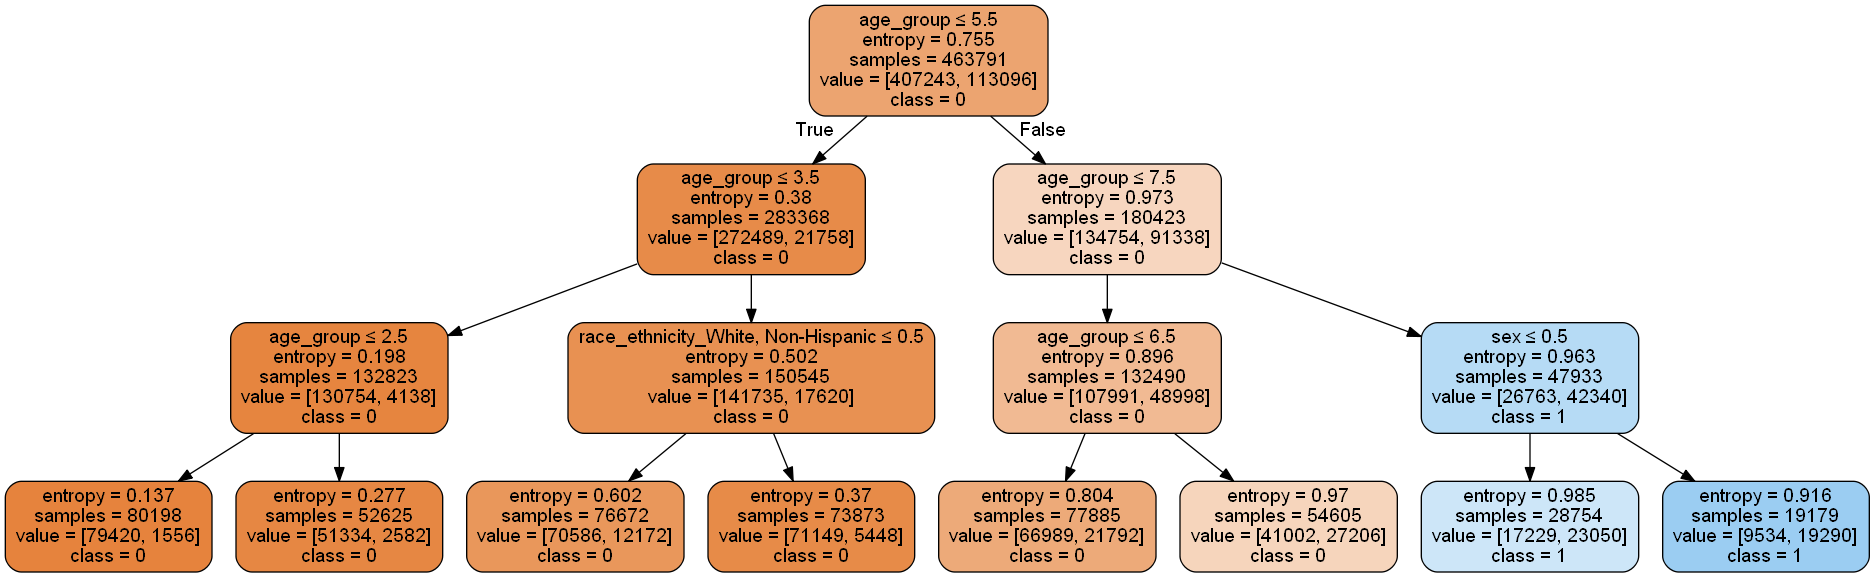

In [485]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('COVID-19_Severe.png')
Image(graph.create_png())

[Text(167.4, 190.26, 'X[1] <= 6.5\nentropy = 0.535\nsamples = 463791\nvalue = [407243, 56548]'),
 Text(83.7, 135.9, 'X[1] <= 4.5\nentropy = 0.329\nsamples = 361253\nvalue = [339478, 21775]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 2.5\nentropy = 0.163\nsamples = 199167\nvalue = [194399, 4768]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.079\nsamples = 80198\nvalue = [79420, 778]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.212\nsamples = 118969\nvalue = [114979, 3990]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 5.5\nentropy = 0.484\nsamples = 162086\nvalue = [145079, 17007]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.375\nsamples = 84201\nvalue = [78090, 6111]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.584\nsamples = 77885\nvalue = [66989, 10896]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 7.5\nentropy = 0.924\nsamples = 102538\nvalue = [67765, 34773]'),
 Text(209.25, 81.53999999999999, 'X[9] <= 0.5\nentropy = 0.81\nsamples = 54605\n

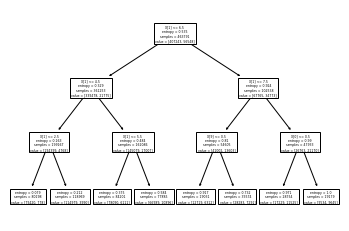

In [411]:
from sklearn import tree

tree.plot_tree(clf)

In [481]:
## # Building Decision Tree model2 with "gini" and other default options
clf2 = DecisionTreeClassifier(max_depth=3, class_weight={0:1, 1:2})

#train model
clf2 = clf2.fit(X_train, y_train)  

#predict with test dataset
y_pred2 = clf2.predict(X_test)

In [482]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8636249295661274


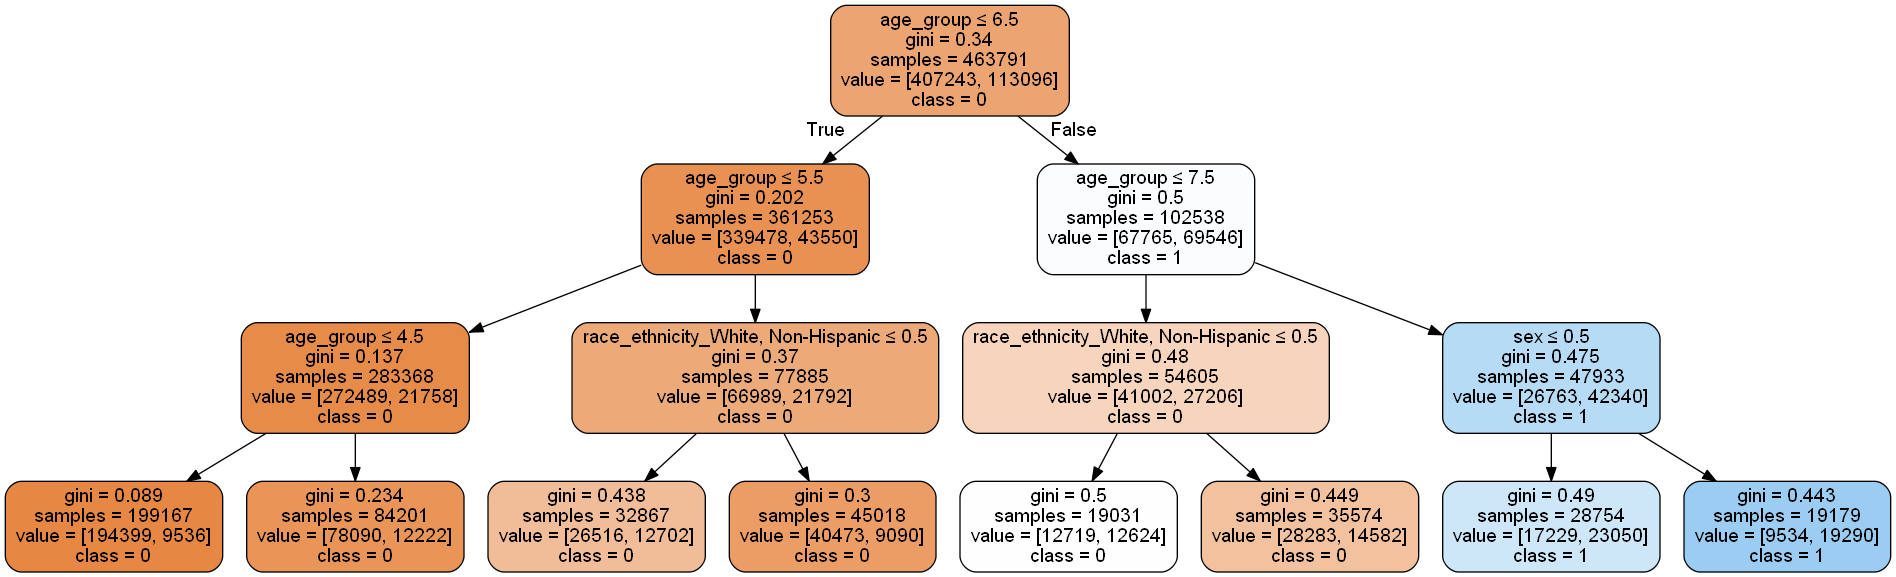

In [470]:
dot_data2 = StringIO()
export_graphviz(clf2, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
graph2.write_png('COVID-19_Severe2.png')
Image(graph2.create_png())